In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Dense,Activation,Flatten, Conv2D, MaxPooling2D
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

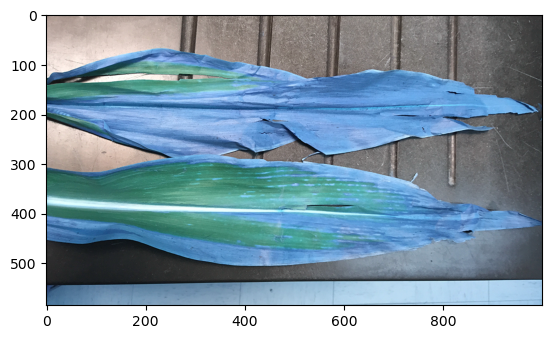

In [2]:
Train_DIR=r'E:\data\training'
Categories=["Blight","Common_Rust","Gray_Leaf_Spot","Healthy"]

for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        old_image=cv2.imread(os.path.join(path,img),cv2.COLOR_BGR2RGB)
        plt.imshow(old_image)
        plt.show()
        break
    break

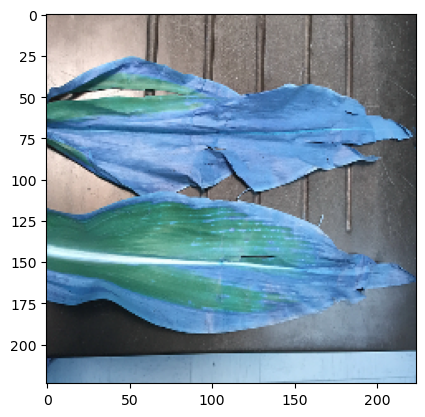

In [3]:
IMG_SIZE=224
new_image=cv2.resize(old_image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [4]:
datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                vertical_flip=True,
                                validation_split=0.2)


train_datagen=datagen.flow_from_directory(r'E:\data\training',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='training')

val_datagen=datagen.flow_from_directory(r'E:\data\training',
                                         target_size=(IMG_SIZE,IMG_SIZE),
                                         batch_size=16,
                                         class_mode='categorical',
                                         subset='validation')

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [5]:
model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))

# Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 128)       7

In [6]:
checkpoint=ModelCheckpoint(r'E:\data\models\model22.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)
earlystop=EarlyStopping(monitor='val_loss',
                       min_delta=0,
                       patience=10,
                       verbose=1,
                       restore_best_weights=True)

callbacks=[checkpoint,earlystop]

In [7]:
model_history=model.fit_generator(train_datagen,validation_data=val_datagen,
                                 epochs=30,
                                 steps_per_epoch=train_datagen.samples//16,
                                 validation_steps=val_datagen.samples//16, 
                                 callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
209/209 [==============================] - ETA: 0s - loss: 0.7145 - accuracy: 0.7038
Epoch 00001: val_loss improved from inf to 0.42068, saving model to E:\data\models\model22.h5
209/209 [==============================] - 245s 1s/step - loss: 0.7145 - accuracy: 0.7038 - val_loss: 0.4207 - val_accuracy: 0.8413
Epoch 2/30
209/209 [==============================] - ETA: 0s - loss: 0.4234 - accuracy: 0.8258
Epoch 00002: val_loss improved from 0.42068 to 0.35796, saving model to E:\data\models\model22.h5
209/209 [==============================] - 233s 1s/step - loss: 0.4234 - accuracy: 0.8258 - val_loss: 0.3580 - val_accuracy: 0.8474
Epoch 3/30
209/209 [==============================] - ETA: 0s - loss: 0.3913 - accuracy: 0.8357
Epoch 00003: val_loss improved from 0.35796 to 0.33128, saving model to E:\data\models\model22.h5
209/209 [==============================] - 208s 998ms/step - loss: 0.3913 - accura

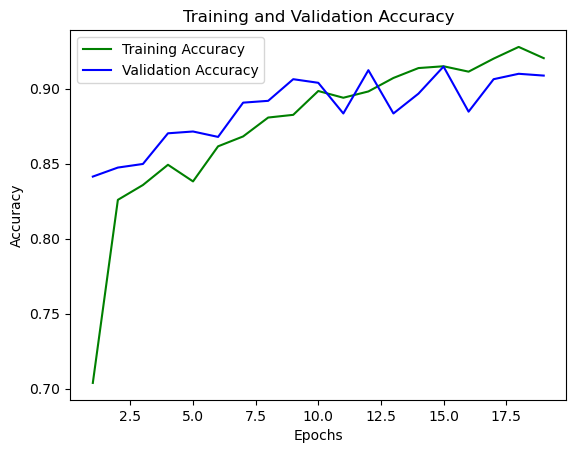

In [12]:
acc_train=model_history.history['accuracy']
acc_val=model_history.history['val_accuracy']
epochs=range(1,20)
plt.plot(epochs,acc_train,'g',label='Training Accuracy')
plt.plot(epochs,acc_val,'b',label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

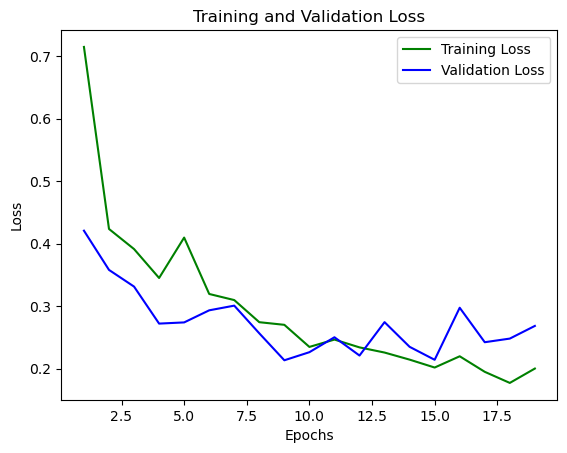

In [13]:
loss_train=model_history.history['loss']
loss_val=model_history.history['val_loss']
epochs=range(1,20)
plt.plot(epochs,loss_train,'g',label='Training Loss')
plt.plot(epochs,loss_val,'b',label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [23]:
val_datagen.class_indices

{'Blight': 0, 'Common_Rust': 1, 'Gray_Leaf_Spot': 2, 'Healthy': 3}

In [24]:
filename="model32.h5"
model.save(filename)

2


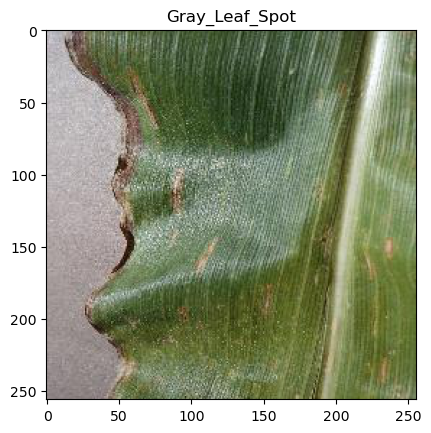

In [14]:
from PIL import Image
from tensorflow.keras.models import load_model

# Load the model from a saved file
model = load_model('model32.h5')
test_image=r'E:\data\training\Gray_Leaf_Spot\Corn_Gray_Spot (54).jpg'
image_result=Image.open(test_image)

from tensorflow.keras.preprocessing import image
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.argmax(result))
Categories=["Blight","Common_Rust","Gray_Leaf_Spot","Healthy"]
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()